# K-Means Clustering Analysis on COVID-19 Pediatric Dataset

 Implementing KMeans to identify patterns in the COVID-19 pediatric data and compare clusters with actual SARS-CoV-2 test results.

In [39]:
# Import required libraries
import os
os.environ["OMP_NUM_THREADS"] = "2"
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Load the dataset
df = pd.read_excel('COVID19 Pediatric Dataset.xlsx')
print('Dataset Shape:', df.shape)
df.head()

Dataset Shape: (5644, 111)


,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# Data preprocessing
# Drop non-numeric columns and handle missing values
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
X = df[numeric_cols].copy()

# First, drop columns where all values are NaN
X = X.dropna(axis=1, how='all')

# Then, for remaining columns with some NaN values:
# 1. Calculate means ignoring NaN values
column_means = X.mean()
# 2. Fill NaN values with means, or 0 if mean is NaN
X = X.fillna(column_means.fillna(0))

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Analyze cluster centers
cluster_centers = pd.DataFrame(
    kmeans.cluster_centers_,
    columns=X.columns
)

# # Plot heatmap of cluster centers
# plt.figure(figsize=(15, 8))
# sns.heatmap(cluster_centers, cmap='YlOrRd', center=0)
# plt.title('Cluster Centers Heatmap')
# plt.xlabel('Features')
# plt.ylabel('Clusters')
# plt.xticks(rotation=90)
# plt.tight_layout()
# plt.show()

# Print the most distinctive features for each cluster
print("\nMost distinctive features for each cluster:")
for i in range(len(cluster_centers)):
    print(f"\nCluster {i}:")
    # Get top 5 highest and lowest values
    sorted_features = cluster_centers.iloc[i].sort_values()
    print("Highest values:")
    print(sorted_features[-5:])
    print("\nLowest values:")
    print(sorted_features[:5])


Most distinctive features for each cluster:

Cluster 0:
Highest values:
Leukocytes                                   0.041793
pO2 (venous blood gas analysis)              0.058494
Hb saturation (venous blood gas analysis)    0.062321
Alkaline phosphatase                         0.065011
Platelets                                    0.074501
Name: 0, dtype: float64

Lowest values:
Patient age quantile   -0.791682
Hemoglobin             -0.187321
Hematocrit             -0.180260
Red blood Cells        -0.140260
Creatinine             -0.134594
Name: 0, dtype: float64

Cluster 1:
Highest values:
Mean corpuscular hemoglobin (MCH)     10.948940
Arterial Lactic Acid                  18.604344
Ionized calcium                       37.702758
pCO2 (arterial blood gas analysis)    45.194238
Phosphor                              48.084072
Name: 1, dtype: float64

Lowest values:
pH (arterial blood gas analysis)            -51.599234
Base excess (arterial blood gas analysis)   -44.569654
Hb saturat

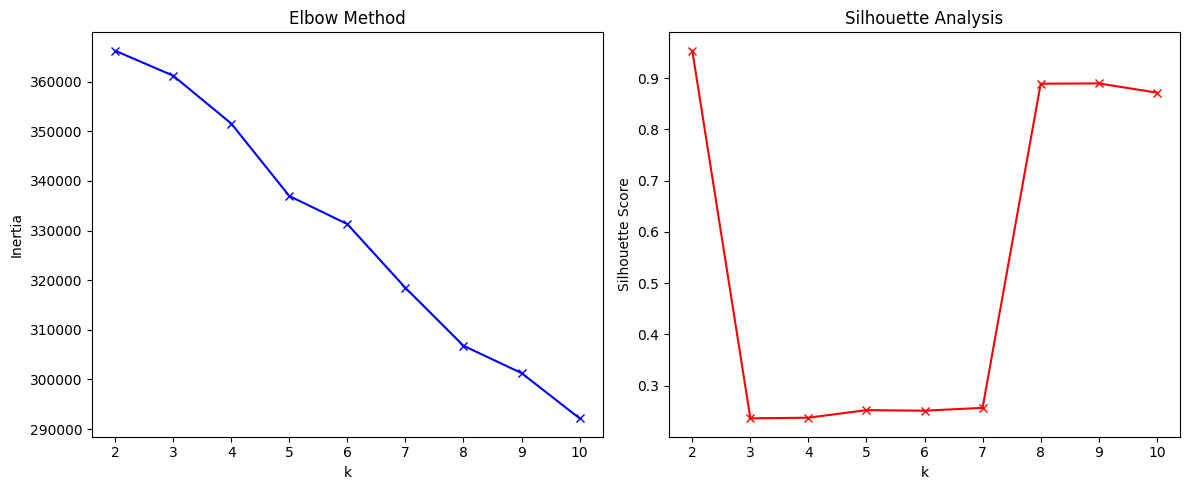

In [42]:
# Find optimal number of clusters using elbow method
inertias = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot elbow curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')

plt.tight_layout()
plt.show()

In [43]:
# Extract target variable (SARS-CoV-2 test results)
target = df['SARS-Cov-2 exam result']

In [44]:
# Apply K-Means with optimal k
optimal_k = 3  # Update this based on elbow method results
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Compare clusters with actual target variable
comparison_df = pd.DataFrame({
    'Cluster': cluster_labels,
    'Actual': target
})

# Create contingency table
contingency_table = pd.crosstab(comparison_df['Cluster'], comparison_df['Actual'])
print("\nContingency Table (Clusters vs Actual Labels):")
print(contingency_table)


Contingency Table (Clusters vs Actual Labels):
Actual   negative  positive
Cluster                    
0            2676       252
1               1         0
2            2409       306


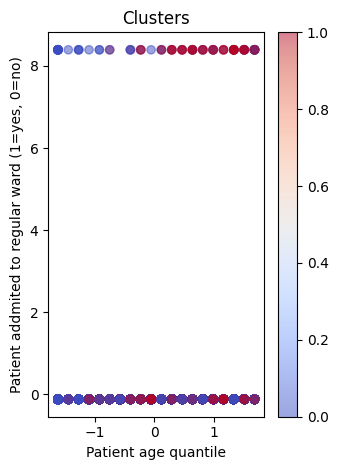

In [45]:
# Get feature names from preprocessed data
feature_names = X.columns.tolist()

# Convert test results to numerical values
color_map = {'positive': 1, 'negative': 0}
colors = [color_map[result] for result in df['SARS-Cov-2 exam result']]

# Now use these numerical values in your scatter plot
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=colors, cmap='coolwarm', alpha=0.5)
plt.colorbar(scatter)
plt.title('Clusters')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])

plt.tight_layout()
plt.show()

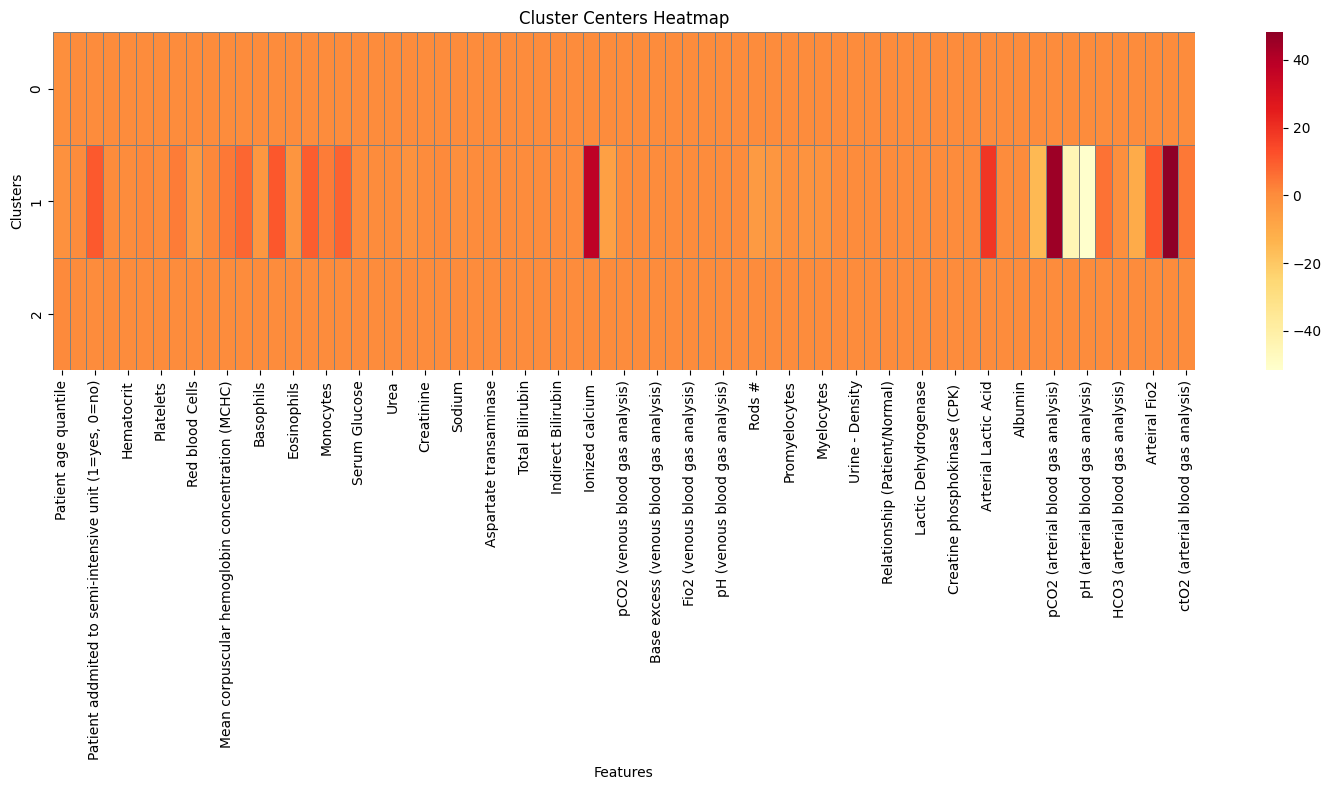


Most distinctive features for each cluster:

Cluster 0:
Highest values:
Leukocytes                                   0.041793
pO2 (venous blood gas analysis)              0.058494
Hb saturation (venous blood gas analysis)    0.062321
Alkaline phosphatase                         0.065011
Platelets                                    0.074501
Name: 0, dtype: float64

Lowest values:
Patient age quantile   -0.791682
Hemoglobin             -0.187321
Hematocrit             -0.180260
Red blood Cells        -0.140260
Creatinine             -0.134594
Name: 0, dtype: float64

Cluster 1:
Highest values:
Mean corpuscular hemoglobin (MCH)     10.948940
Arterial Lactic Acid                  18.604344
Ionized calcium                       37.702758
pCO2 (arterial blood gas analysis)    45.194238
Phosphor                              48.084072
Name: 1, dtype: float64

Lowest values:
pH (arterial blood gas analysis)            -51.599234
Base excess (arterial blood gas analysis)   -44.569654
Hb saturat

In [46]:
# Analyze cluster centers
feature_names = X.columns  # Use only the column names from the preprocessed data X
cluster_centers = pd.DataFrame(
    kmeans.cluster_centers_,
    columns=feature_names
)

# Plot heatmap of cluster centers
plt.figure(figsize=(15, 8))
# sns.heatmap(cluster_centers, cmap='YlOrRd', center=0)
sns.heatmap(
    cluster_centers,
    cmap='YlOrRd',  # Diverging colormap
    center=0,
    linewidths=0.5,  # Add thin lines
    linecolor='gray'  # Use gray for subtle separation
)

plt.title('Cluster Centers Heatmap')
plt.xlabel('Features')
plt.ylabel('Clusters')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Print the most important features for each cluster
print("\nMost distinctive features for each cluster:")
for i in range(len(cluster_centers)):
    print(f"\nCluster {i}:")
    # Get top 5 highest and lowest values
    sorted_features = cluster_centers.iloc[i].sort_values()
    print("Highest values:")
    print(sorted_features[-5:])
    print("\nLowest values:")
    print(sorted_features[:5])